In [7]:
import numpy as np  
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score

In [3]:
# import pandas as pd
# from faker import Faker
# import random

# fake = Faker()

# def generate_fake_data(num_rows):
#     data = []
#     for _ in range(num_rows):
#         pregnancies = random.randint(0, 17)
#         glucose = random.randint(0, 200)
#         blood_pressure = random.randint(0, 150)
#         skin_thickness = random.randint(0, 100)
#         insulin = random.randint(0, 300)
#         bmi = random.uniform(0, 50)
#         diabetes_pedigree_function = random.uniform(0, 2)
#         age=random.randint(0,90)
#         outcome = random.choice([0, 1])
        
#         data.append({
#             'Pregnancies': pregnancies,
#             'Glucose': glucose,
#             'BloodPressure': blood_pressure,
#             'SkinThickness': skin_thickness,
#             'Insulin': insulin,
#             'BMI': bmi,
#             'DiabetesPedigreeFunction': diabetes_pedigree_function,
#             'Age': age,
#             'Outcome': outcome
#         })
#     return data

# # Generate fake data
# fake_data = generate_fake_data(10000)

# # Create a DataFrame from the existing data
# existing_data = pd.read_csv('diabetes.csv')

# # Concatenate existing data with fake data
# combined_data = pd.concat([existing_data, pd.DataFrame(fake_data)], ignore_index=True)

# # Save to Excel
# combined_data.to_csv('data.csv', index=False)


In [8]:
# Read the dataset
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:

# X = diabetes_dataset.drop(columns=['Outcome'])  
# y = diabetes_dataset['Outcome']   
# smote = SMOTE(sampling_strategy='auto', random_state=42)  
# X_resampled, y_resampled = smote.fit_resample(X, y)
# df = pd.concat([X_resampled, y_resampled], axis=1)
# df

In [12]:
df=df.sample(frac=1)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
232            1       79             80             25       37  25.4   
192            7      159             66              0        0  30.4   
402            5      136             84             41       88  35.0   
392            1      131             64             14      415  23.7   
206            8      196             76             29      280  37.5   
..           ...      ...            ...            ...      ...   ...   
548            1      164             82             43       67  32.8   
435            0      141              0              0        0  42.4   
176            6       85             78              0        0  31.2   
753            0      181             88             44      510  43.3   
459            9      134             74             33       60  25.9   

     DiabetesPedigreeFunction  Age  Outcome  
232                     0.583   22        0  
192                     0.383   36        1  
402                     0.286   35        1  
392                     0.389   21        0  
206                     0.605   57        1  
..                        ...  ...      ...  
548                     0.341   50        0  
435                     0.205   29        1  
176                     0.382   42        0  
753                     0.222   26        1  
459                     0.460   81        0  

[768 rows x 9 columns]

In [13]:
X = df.drop(columns=['Outcome'])  
y = df['Outcome']  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0              1       79             80             25       37  25.400000   
1              7      159             66              0        0  30.400000   
2              5      136             84             41       88  35.000000   
3              1      131             64             14      415  23.700000   
4              8      196             76             29      280  37.500000   
..           ...      ...            ...            ...      ...        ...   
995            2      129             85             30       70  29.831213   
996            4      138             78              0        0  36.631485   
997            0      143             70              0        0  35.985449   
998            9      128             61             36        0  40.796459   
999            2      162             70              0        0  37.119146   

     DiabetesPedigreeFunction  Age  Outcome  
0                    0.583000   22        0  
1                    0.383000   36        1  
2                    0.286000   35        1  
3                    0.389000   21        0  
4                    0.605000   57        1  
..                        ...  ...      ...  
995                  0.719764   33        1  
996                  0.337287   43        1  
997                  0.378247   26        1  
998                  0.430454   38        1  
999                  1.038507   33        1  

[1000 rows x 9 columns]

In [14]:
plt.figure(figsize=(25,25), dpi= 100)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

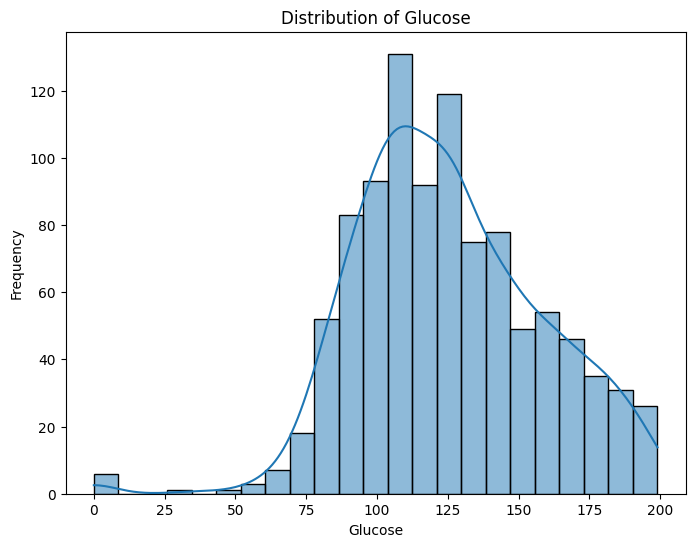

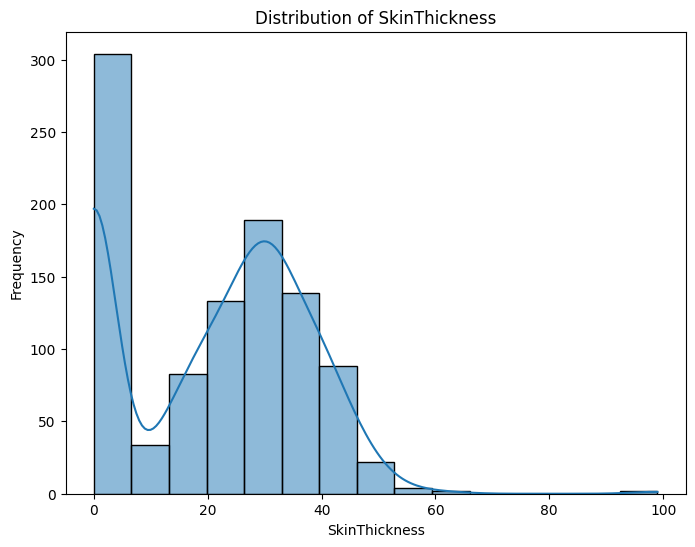

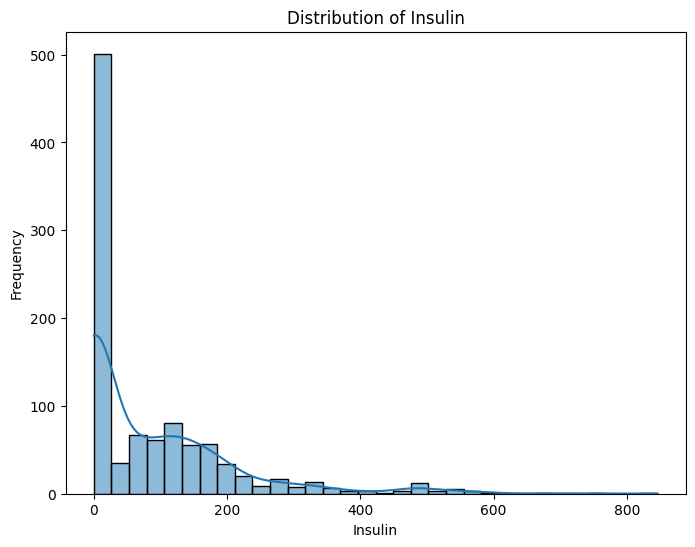

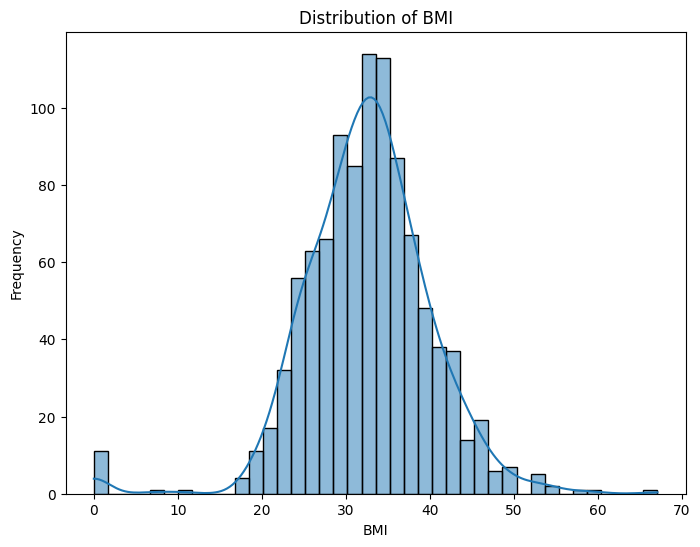

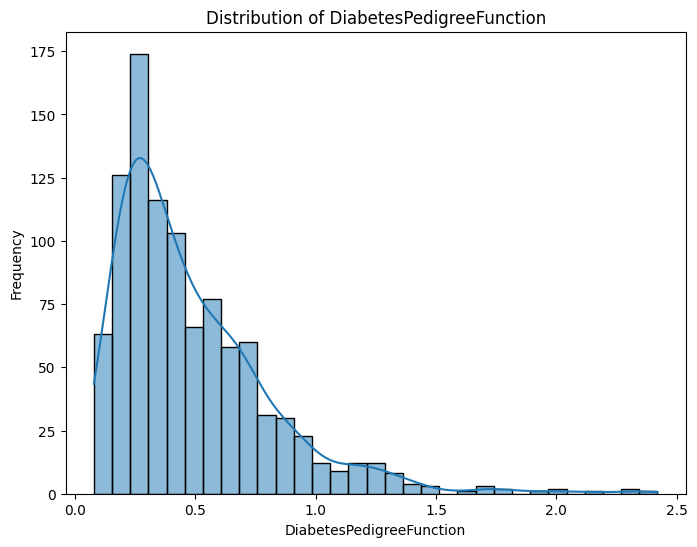

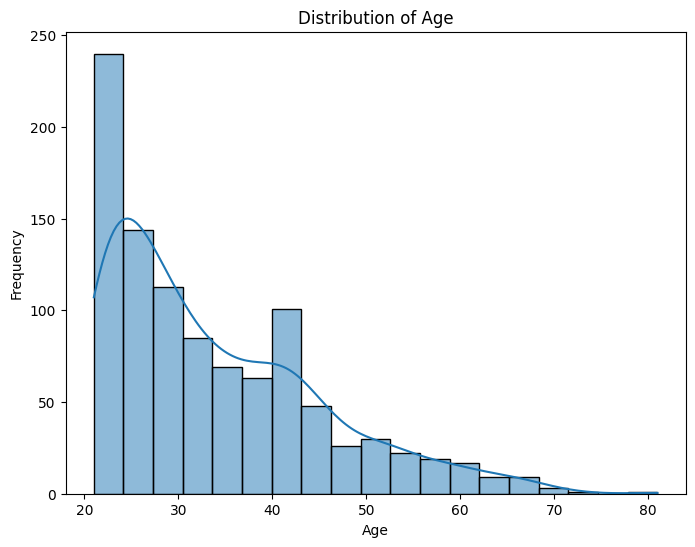

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Iterate over each column in the DataFrame
for column in df.columns:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the distribution of the column using a histogram
    sns.histplot(df[column], kde=True, ax=ax)
    
    # Add labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')
    
    # Show the plot
    plt.show()


In [16]:
df=df.sample(frac=1)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
853            1      167             73             16      144  23.432665   
956            6      162             60             27      175  28.899065   
315            5      108             72             43       75  36.100000   
718            3      102             44             20       94  30.800000   
419            3      158             70             30      328  35.500000   
..           ...      ...            ...            ...      ...        ...   
95             0      180             66             39        0  42.000000   
355           10      162             84              0        0  27.700000   
854            1      131              0              0        0  39.367312   
928           10      135             82             35      129  28.978950   
78             5       96             74             18       67  33.600000   

     DiabetesPedigreeFunction  Age  Outcome  
853                  0.446554   33        1  
956                  0.587659   43        1  
315                  0.263000   33        0  
718                  0.400000   26        0  
419                  0.344000   35        1  
..                        ...  ...      ...  
95                   1.893000   25        1  
355                  0.182000   54        0  
854                  0.281907   24        1  
928                  0.271915   42        1  
78                   0.997000   43        0  

[1000 rows x 9 columns]

In [17]:
X=df.iloc[:,0:8]
X = np.log1p(X)
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
853     0.693147  5.123964       4.304065       2.833213  4.976734  3.195921   
956     1.945910  5.093750       4.110874       3.332205  5.170484  3.397827   
315     1.791759  4.691348       4.290459       3.784190  4.330733  3.613617   
718     1.386294  4.634729       3.806662       3.044522  4.553877  3.459466   
419     1.386294  5.068904       4.262680       3.433987  5.796058  3.597312   
..           ...       ...            ...            ...       ...       ...   
95      0.000000  5.198497       4.204693       3.688879  0.000000  3.761200   
355     2.397895  5.093750       4.442651       0.000000  0.000000  3.356897   
854     0.693147  4.882802       0.000000       0.000000  0.000000  3.698020   
928     2.397895  4.912655       4.418841       3.583519  4.867534  3.400495   
78      1.791759  4.574711       4.317488       2.944439  4.219508  3.543854   

     DiabetesPedigreeFunction       Age  
853                  0.369184  3.526361  
956                  0.462261  3.784190  
315                  0.233490  3.526361  
718                  0.336472  3.295837  
419                  0.295650  3.583519  
..                        ...       ...  
95                   1.062294  3.258097  
355                  0.167208  4.007333  
854                  0.248349  3.218876  
928                  0.240524  3.761200  
78                   0.691646  3.784190  

[1000 rows x 8 columns]

In [18]:
y=df.iloc[:, 8]

In [19]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=128)
scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
new_threshold = 0.3
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
rf_predictions = (rf_probabilities > new_threshold).astype(int)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Best Parameters:", grid_search.best_params_)
print(f"F1 Score: {grid_search.best_score_:.4f}")
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
F1 Score: 0.8088
Accuracy: 80.50%


In [22]:
conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix \n",conf_matrix)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Confusion Matrix 
 [[ 56  30]
 [  9 105]]


In [23]:
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report:\n", rf_classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.65      0.74        86
           1       0.78      0.92      0.84       114

    accuracy                           0.81       200
   macro avg       0.82      0.79      0.79       200
weighted avg       0.81      0.81      0.80       200



In [24]:
from sklearn.metrics import accuracy_score

# Define a range of thresholds to try
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize variables to keep track of the best threshold and its corresponding accuracy
best_threshold = None
best_accuracy = 0

# Loop through each threshold
for threshold in thresholds:
    # Make predictions using the current threshold
    rf_predictions = (rf_probabilities > threshold).astype(int)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, rf_predictions)
    # Update best threshold and accuracy if the current threshold performs better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)


Best Threshold: 0.5
Best Accuracy: 0.82


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=128)

# Define the scorer
scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
new_threshold = 0.5

# Get probabilities and make predictions based on the new threshold
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
rf_predictions = (rf_probabilities > new_threshold).astype(int)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print results
print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 82.00%


In [26]:
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report:\n", rf_classification_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        86
           1       0.88      0.80      0.83       114

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

